In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [2]:
import cv2
import numpy as np
import easyocr
from matplotlib import pyplot as plt

In [3]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [4]:
from google.colab import files
uploaded = files.upload()

# Load the uploaded image (replace with your own filename)
image_path = next(iter(uploaded.keys()))
image = cv2.imread(image_path)

Saving image_project.png to image_project.png


In [5]:
results = reader.readtext(image, detail=1)

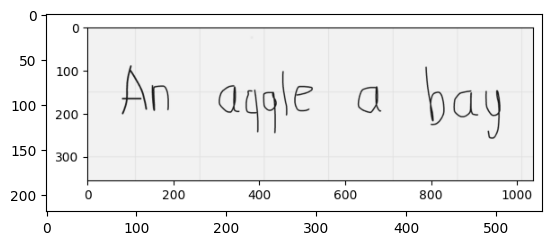

In [6]:
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [7]:
from matplotlib.patches import Rectangle

Predicted Word: 100, Confidence: 1.00
Predicted Word: 200, Confidence: 1.00
Predicted Word: An, Confidence: 0.99
Predicted Word: ayqle, Confidence: 0.56
Predicted Word: 300, Confidence: 1.00
Predicted Word: 200, Confidence: 1.00
Predicted Word: 400, Confidence: 1.00
Predicted Word: 500, Confidence: 0.91
Predicted Word: 800, Confidence: 1.00
Predicted Word: 1000, Confidence: 1.00
Predicted Word: bay, Confidence: 1.00


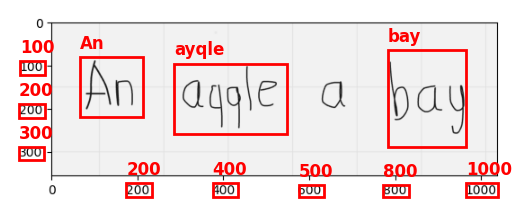

In [8]:
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert image to RGB for displaying

for (bbox, text, confidence) in results:
    print(f"Predicted Word: {text}, Confidence: {confidence:.2f}")

    (top_left, top_right, bottom_right, bottom_left) = bbox
    x_min, y_min = int(top_left[0]), int(top_left[1])
    x_max, y_max = int(bottom_right[0]), int(bottom_right[1])
    width, height = x_max - x_min, y_max - y_min

    rect = Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    ax.text(x_min, y_min - 10, text, color='red', fontsize=12, weight='bold')

plt.axis('off')
plt.show()

In [9]:
detected_letters = [result[1] for result in results]

In [10]:
import pandas as pd

In [11]:
def compare_texts(original_sentence, detected_letters):
    detected_string = ''.join(detected_letters)
    max_len = max(len(original_sentence), len(detected_string))
    original_sentence = original_sentence.ljust(max_len)
    detected_string = detected_string.ljust(max_len)
    comparison = []
    for orig, detected in zip(original_sentence, detected_string):
        status = "Match" if orig == detected else "Mismatch"
        comparison.append({
            "Original Letter": orig,
            "Detected Letter": detected,
            "Status": status
        })
    comparison_df = pd.DataFrame(comparison)
    return comparison_df

In [12]:
sentence = "An apple a day"

In [13]:
original_sentence = sentence.replace(" ","")

In [14]:
print(original_sentence)

Anappleaday


In [15]:
comparison_table = compare_texts(original_sentence, detected_letters)

In [16]:
def display_table_with_colors(df):
    fig, ax = plt.subplots(figsize=(10, len(df) * 0.8))
    ax.axis("tight")
    ax.axis("off")

    # Color-coding rows based on status
    cell_colors = [["#d4edda" if row["Status"] == "Match" else "#f8d7da" for _ in row] for _, row in df.iterrows()]

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        loc="center",
        cellLoc="center",
        cellColours=cell_colors,
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))

    # Style header
    for (row, col), cell in table.get_celld().items():
        if row == 0:  # Header row
            cell.set_text_props(weight="bold", color="white")
            cell.set_facecolor("#343a40")

    plt.show()

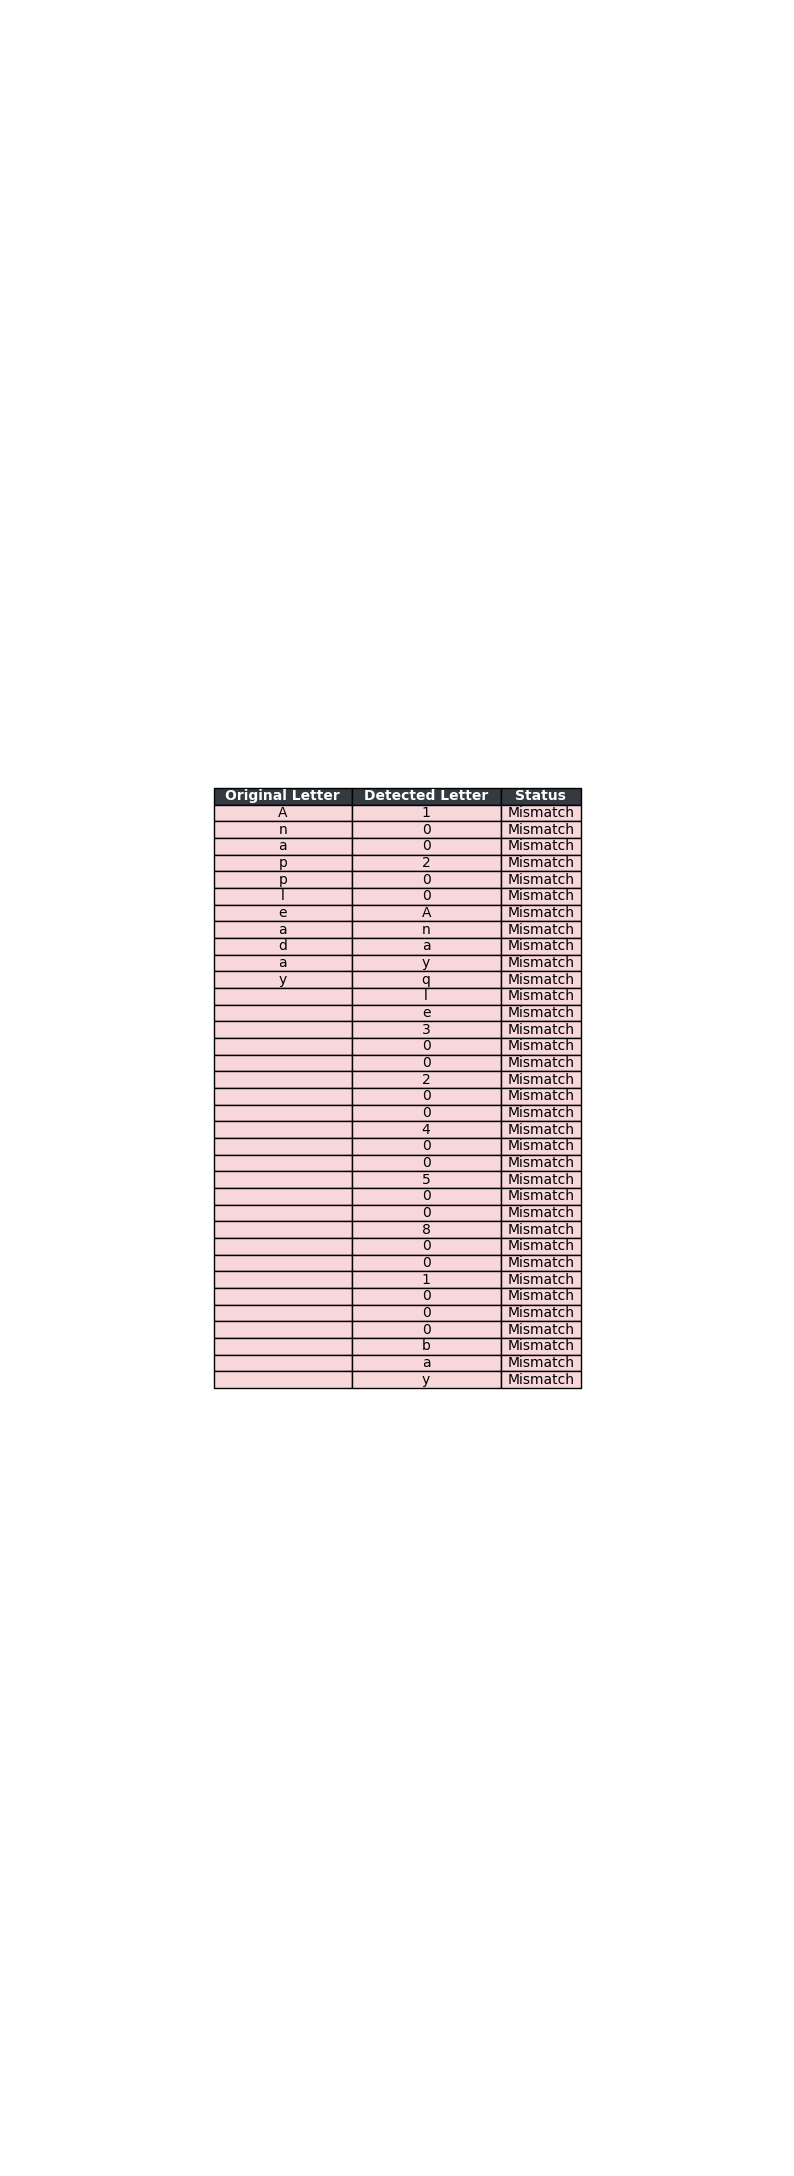

In [17]:
display_table_with_colors(comparison_table)

In [18]:
from prettytable import PrettyTable

In [19]:
def create_pretty_table(df):
    table = PrettyTable()
    table.field_names = df.columns.tolist()

    # Add rows with conditional coloring
    for _, row in df.iterrows():
        row_color = "\033[92m" if row["Status"] == "Match" else "\033[91m"
        table.add_row([f"{row_color}{val}\033[0m" for val in row])

    return table

In [20]:
pretty_table = create_pretty_table(comparison_table)
print(pretty_table)

+-----------------+-----------------+----------+
| Original Letter | Detected Letter |  Status  |
+-----------------+-----------------+----------+
|        A        |        1        | Mismatch |
|        n        |        0        | Mismatch |
|        a        |        0        | Mismatch |
|        p        |        2        | Mismatch |
|        p        |        0        | Mismatch |
|        l        |        0        | Mismatch |
|        e        |        A        | Mismatch |
|        a        |        n        | Mismatch |
|        d        |        a        | Mismatch |
|        a        |        y        | Mismatch |
|        y        |        q        | Mismatch |
|                 |        l        | Mismatch |
|                 |        e        | Mismatch |
|                 |        3        | Mismatch |
|                 |        0        | Mismatch |
|                 |        0        | Mismatch |
|                 |        2        | Mismatch |
|                 | 